In [22]:
import json
import logging
import urllib
from IPython.display import Image as I_note
from IPython.display import display
from IPython.core.display import HTML
from multiprocessing.dummy import Pool as ThreadPool
from time import sleep


import numpy as np
import pytesseract  # need to install using pip
from PIL import Image  # need to install Pillow using pip
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions, InceptionV3

from random import randint
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

def load_doc(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

def save_doc(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [25]:
cnnmodel = InceptionV3(weights='imagenet')

# load the model
model = load_model('LangModel2/caption_model_3.h5')
tokenizer = load(open('LangModel2/caption_tokenizer_3.pkl', 'rb'))

# load cleaned text sequences
in_filename = 'LangModel/padded_captions.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')

#classification_result should be the first predicted type generated from gerard's classifier
classification_result = ''
#loop through lines and find a caption that begins with the same class
#use that as seed_text


In [26]:

def predict(path):
    img = image.load_img(path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = cnnmodel.predict(x)
    return [m[1] for m in decode_predictions(preds, top=5)[0]]


def caption(path):
    pred = predict(path)[0]
    
    
    seq_length = 9
    seed_text = 'STOP STOP STOP STOP STOP STOP STOP STOP STOP '+pred

    #seq_length = len(seed_text)

    n_words = 10

    result = list()
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # truncate sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        # predict probabilities for each word

        #USE LINE BELOW TO IGNORE THE STOP WORD FROM BEING CHOSEN IF WE WANT.
        #OTHERWISE JUST MORE TRAINING WORKED TO GET RID OF TOO HIGH PROB GIVEN TO NULL VALUES
        #print(model.predict_proba(encoded)) 

        yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
        result.append(out_word)

    return '['+seed_text+'] '+' '.join(result)



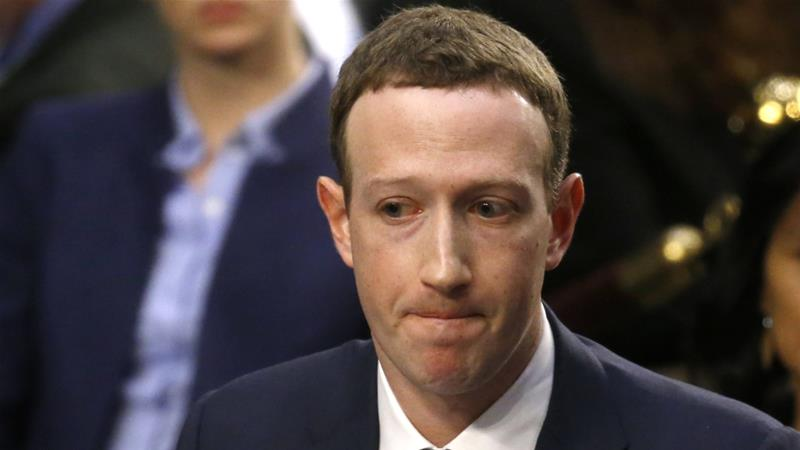

In [29]:
path = 'zuck.jpg'
display(I_note(path, width=400, height=400))

In [28]:
caption(path)

'[STOP STOP STOP STOP STOP STOP STOP STOP STOP suit]you are a great because my hotel alone STOP STOP'